In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew

In [3]:
data1 = pd.read_csv("delivery_time.csv")
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data1.shape

(21, 2)

In [6]:
data1=data1.rename(columns={'Delivery Time': 'DT','Sorting Time':'ST'}, inplace=False)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
print(kurtosis(data1.DT))
print(kurtosis(data1.ST))

-0.02558576894549036
-1.1653901357029155


In [9]:
print(skew(data1.DT))
print(skew(data1.ST))

0.326702631656106
0.043680994983108075


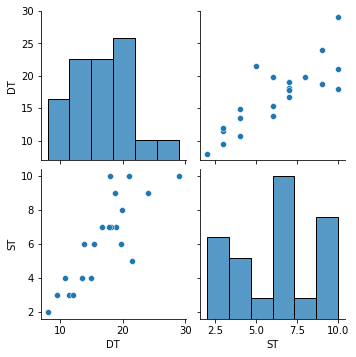

In [10]:
import seaborn as sns
sns.pairplot(data1)

<AxesSubplot:>

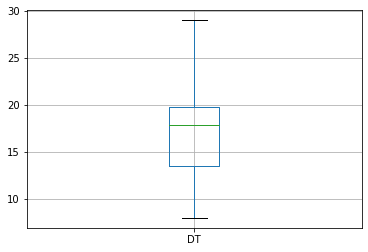

In [11]:
data1.boxplot(column=['DT'])

<AxesSubplot:>

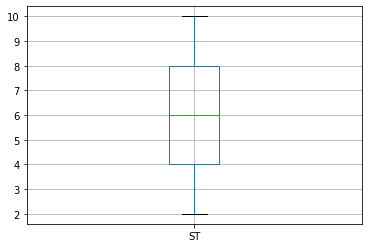

In [12]:
data1.boxplot(column=['ST'])

<AxesSubplot:>

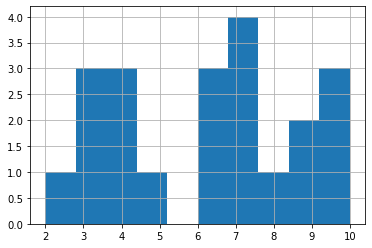

In [13]:
data1['ST'].hist()

In [14]:
data1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


C:\Users\bhavy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

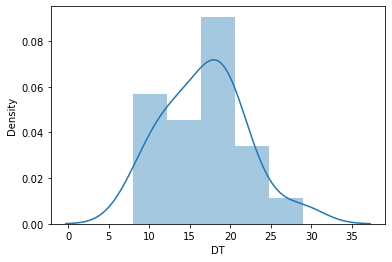

In [15]:
sns.distplot(data1['DT'])

C:\Users\bhavy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

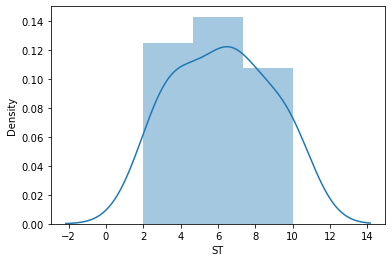

In [16]:
sns.distplot(data1['ST'])

In [17]:
import statsmodels.formula.api as smf

In [18]:
model = smf.ols("DT~ST",data = data1).fit()
model

<AxesSubplot:xlabel='ST', ylabel='DT'>

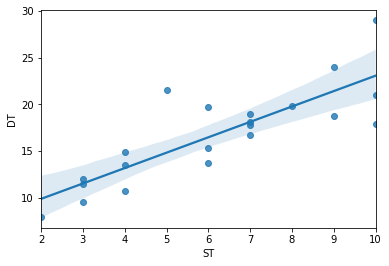

In [19]:
sns.regplot(x="ST", y="DT", data=data1)

In [20]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        09:47:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.resid 
model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [23]:
pred = model.predict(pd.DataFrame(data1['ST']))
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [24]:
rmse_log = np.sqrt(np.mean((np.array(data1['DT'])-np.array(pred))**2))
rmse_log 

2.7916503270617654

In [25]:
pred.corr(data1.DT)

0.8259972607955327

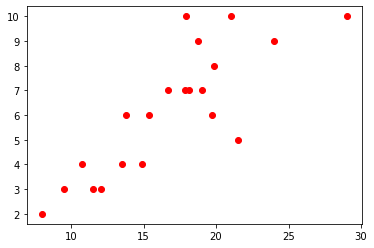

In [28]:
plt.scatter(x=data1['DT'],y=data1['ST'],color='red')


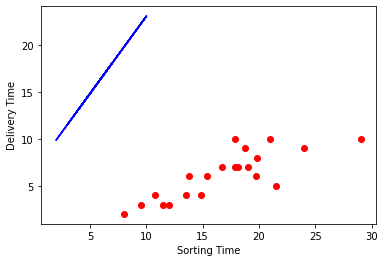

In [29]:
plt.plot(data1['ST'],pred,color='blue')
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')
plt.scatter(x=data1['DT'],y=data1['ST'],color='red')